In [1]:
!pip install imbalanced-learn
%pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\91765\AppData\Local\Temp\ipykernel_2580\3796916654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data=pd.read_csv("ThyroidDataset.csv")

In [4]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
data.shape

(3772, 30)

In [7]:
data['thyroid surgery'].value_counts()

thyroid surgery
f    3719
t      53
Name: count, dtype: int64

In [8]:
data['age'].value_counts()

age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: count, Length: 94, dtype: int64

In [9]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [10]:
data.replace('?',np.nan,inplace=True)

In [11]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


In [12]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [13]:
data['binaryClass'].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [14]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
  data[i] = pd.to_numeric(data[i],errors = 'coerce')


In [15]:
df_numerical_features = data.select_dtypes(include='float64')
df_categorical_features = data.select_dtypes(include='object')

In [16]:
df_numerical_features.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [17]:
df_categorical_features.describe()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,P
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [18]:
data=data.drop('TBG',axis=1)
data=data.drop('TBG measured',axis=1)

In [19]:
from sklearn.impute import SimpleImputer

simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(data.select_dtypes(exclude='O')))

cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(data.select_dtypes(exclude='number')))

numerical_missing.columns=data.select_dtypes(exclude='O').columns
categorical_missing.columns=data.select_dtypes(exclude='number').columns

df=pd.concat([numerical_missing,categorical_missing],axis=1)

In [20]:
for feature in categorical_missing :
    print(f"{feature}:{categorical_missing[feature].unique()}")

sex:['F' 'M']
on thyroxine:['f' 't']
query on thyroxine:['f' 't']
on antithyroid medication:['f' 't']
sick:['f' 't']
pregnant:['f' 't']
thyroid surgery:['f' 't']
I131 treatment:['f' 't']
query hypothyroid:['f' 't']
query hyperthyroid:['f' 't']
lithium:['f' 't']
goitre:['f' 't']
tumor:['f' 't']
hypopituitary:['f' 't']
psych:['f' 't']
TSH measured:['t' 'f']
T3 measured:['t' 'f']
TT4 measured:['t' 'f']
T4U measured:['t' 'f']
FTI measured:['t' 'f']
referral source:['SVHC' 'other' 'SVI' 'STMW' 'SVHD']
binaryClass:['P' 'N']


In [21]:
copy_ds=data.copy()

In [22]:
df_categorical_features1 = copy_ds.select_dtypes(include='object')
df_numerical_features1 = copy_ds.select_dtypes(exclude='object')

In [23]:
for feature in df_categorical_features1:
    print(f"{feature}:{df_categorical_features1[feature].unique()}")

sex:['F' 'M' nan]
on thyroxine:['f' 't']
query on thyroxine:['f' 't']
on antithyroid medication:['f' 't']
sick:['f' 't']
pregnant:['f' 't']
thyroid surgery:['f' 't']
I131 treatment:['f' 't']
query hypothyroid:['f' 't']
query hyperthyroid:['f' 't']
lithium:['f' 't']
goitre:['f' 't']
tumor:['f' 't']
hypopituitary:['f' 't']
psych:['f' 't']
TSH measured:['t' 'f']
T3 measured:['t' 'f']
TT4 measured:['t' 'f']
T4U measured:['t' 'f']
FTI measured:['t' 'f']
referral source:['SVHC' 'other' 'SVI' 'STMW' 'SVHD']
binaryClass:['P' 'N']


In [24]:
data['binaryClass'].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [25]:
df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVHC,P
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,t,f,f,other,P
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,t,f,t,t,t,other,P
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,t,f,f,other,P
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [26]:
df.shape

(3772, 28)

In [27]:
df.isnull().sum()

age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
T3 measured                  0
TT4 measured                 0
T4U measured                 0
FTI measured                 0
referral source              0
binaryClass                  0
dtype: int64

In [28]:
df[df.age>100]

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
1364,455.0,1.1,2.0,118.0,1.13,104.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [29]:
df=df.drop(df.age.index[1364])

In [30]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers
outliers_data=outliers_removal(df)
outliers_data

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
7,80.0,2.20,0.6,80.0,0.70,115.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
10,84.0,1.10,2.2,115.0,0.95,121.0,F,f,f,f,...,t,f,f,t,t,t,t,t,SVI,P
18,80.0,6.00,1.6,99.0,0.95,104.0,F,f,f,f,...,f,f,t,t,t,t,t,t,SVI,P
22,81.0,1.90,0.3,102.0,0.96,106.0,M,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
34,85.0,7.30,2.4,66.0,1.09,61.0,F,f,f,f,...,f,f,f,t,t,t,t,t,other,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,80.0,0.80,2.3,124.0,1.04,118.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
3732,84.0,0.30,2.0,154.0,0.97,159.0,F,t,f,f,...,f,f,f,t,f,t,t,t,other,P
3737,81.0,2.50,1.8,76.0,1.02,75.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
3755,81.0,1.40,1.0,92.0,0.99,93.0,F,f,f,f,...,f,f,f,t,t,t,t,t,other,P


In [31]:
new_df=df.drop(outliers_data.index)
new_df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVHC,P
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,t,f,f,other,P
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,t,f,t,t,t,other,P
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,t,f,f,other,P
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [32]:
new_df.shape

(3588, 28)

In [33]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on thyroxine',
       'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
       'thyroid surgery', 'I131 treatment', 'query hypothyroid',
       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
       'FTI measured', 'referral source', 'binaryClass'],
      dtype='object')

In [34]:
new_df['sex'].value_counts()

sex
F    2493
M    1095
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
for column in new_df.columns:
  if new_df[column].dtype==np.number:
    continue
  new_df[column]=LabelEncoder().fit_transform(new_df[column])

In [36]:
new_df

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,23.0,4.10,2.0,102.0,0.98,107.0,0,0,0,0,...,0,0,0,1,1,1,0,0,4,1
2,46.0,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,0,0,0,1,0,1,1,1,4,1
3,70.0,0.16,1.9,175.0,0.98,107.0,0,1,0,0,...,0,0,0,1,1,1,0,0,4,1
4,70.0,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,0,0,0,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0,103.0,0.98,107.0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,1
3768,68.0,1.00,2.1,124.0,1.08,114.0,0,0,0,0,...,0,0,0,1,1,1,1,1,3,1
3769,74.0,5.10,1.8,112.0,1.07,105.0,0,0,0,0,...,0,0,0,1,1,1,1,1,4,1
3770,72.0,0.70,2.0,82.0,0.94,87.0,1,0,0,0,...,0,0,0,1,1,1,1,1,3,1


In [37]:
new_df.describe()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,49.974916,4.834338,2.029431,108.075474,0.996377,109.891499,0.305184,0.127090,0.013378,0.011427,...,0.025362,0.000279,0.049331,0.899108,0.792921,0.937012,0.894649,0.895206,3.279543,0.921962
std,17.935141,23.884207,0.738783,34.724323,0.185335,31.507648,0.460549,0.333121,0.114903,0.106299,...,0.157245,0.016695,0.216589,0.301227,0.405269,0.242975,0.307048,0.306330,1.109130,0.268269
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.600000,1.700000,89.000000,0.890000,94.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,53.000000,1.400000,2.000000,103.000000,0.980000,107.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,65.000000,2.400000,2.300000,123.000000,1.070000,121.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
max,79.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [38]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1]

In [39]:
Y.value_counts()

binaryClass
1    3308
0     280
Name: count, dtype: int64

In [40]:
X,Y=SMOTE().fit_resample(X,Y)
X.shape,Y.shape

((6616, 27), (6616,))

In [41]:
Y.value_counts()

binaryClass
1    3308
0    3308
Name: count, dtype: int64

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5292, 27), (1324, 27), (5292,), (1324,))

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [45]:
print('Training dataset shape:', X_train.shape, Y_train.shape)
print('Testing dataset shape:', X_test.shape, Y_test.shape)

Y_train_resample_flat = Y_train.to_numpy().ravel()
Y_test_resample_flat = Y_test.to_numpy().ravel()

print('Training dataset shape:', X_train.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test.shape, Y_test_resample_flat.shape)

Training dataset shape: (5292, 27) (5292,)
Testing dataset shape: (1324, 27) (1324,)
Training dataset shape: (5292, 27) (5292,)
Testing dataset shape: (1324, 27) (1324,)


In [46]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
forward_fs = forward_fs.fit(X_train, Y_train_resample_flat)


[2024-02-16 23:30:34] Features: 1/10 -- score: 0.9865836265264338
[2024-02-16 23:31:00] Features: 2/10 -- score: 0.9920635260642865
[2024-02-16 23:31:23] Features: 3/10 -- score: 0.9958429948715752
[2024-02-16 23:31:48] Features: 4/10 -- score: 0.997354389685315
[2024-02-16 23:32:14] Features: 5/10 -- score: 0.9977324615189633
[2024-02-16 23:32:35] Features: 6/10 -- score: 0.9973542111811442
[2024-02-16 23:32:54] Features: 7/10 -- score: 0.997165889281003
[2024-02-16 23:33:14] Features: 8/10 -- score: 0.9979216759399584
[2024-02-16 23:33:35] Features: 9/10 -- score: 0.9973542111811444
[2024-02-16 23:33:57] Features: 10/10 -- score: 0.9969761393474957

In [47]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

X_train_new=X_train[['age','sex','TSH', 'TT4', 'FTI', 'on thyroxine', 'on antithyroid medication', 'goitre', 'hypopituitary', 'psych', 'T3 measured', 'referral source']]
X_test_new=X_test[['age','sex','TSH', 'TT4', 'FTI', 'on thyroxine',  'on antithyroid medication', 'goitre', 'hypopituitary', 'psych', 'T3 measured', 'referral source']]

['TSH', 'T3', 'TT4', 'on thyroxine', 'sick', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre', 'TSH measured']


In [48]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.62%
---------------------------------
Confusion Matrix:
[[2659    3]
 [  17 2613]]

Test Result:
Accuracy Score:100.00%
---------------------------------
Confusion Matrix:
[[646   0]
 [  0 678]]



In [49]:
lr=LogisticRegression(random_state=0,max_iter=10)

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:97.41%
---------------------------------
Confusion Matrix:
[[2619   43]
 [  94 2536]]

Test Result:
Accuracy Score:97.73%
---------------------------------
Confusion Matrix:
[[634  12]
 [ 18 660]]



In [50]:
gnb=GaussianNB()

gnb_model=gnb.fit(X_train_new,Y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
gnb_test_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:60.51%
---------------------------------
Confusion Matrix:
[[2648   14]
 [2076  554]]

Test Result:
Accuracy Score:60.42%
---------------------------------
Confusion Matrix:
[[643   3]
 [521 157]]



In [51]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:98.32%
---------------------------------
Confusion Matrix:
[[2653    9]
 [  80 2550]]

Test Result:
Accuracy Score:97.73%
---------------------------------
Confusion Matrix:
[[644   2]
 [ 28 650]]



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train_new,Y_train_resample_flat, cv=kf)

clf.fit(X_train_new,Y_train_resample_flat)
dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)


Train Result:
Accuracy Score:99.81%
---------------------------------
Confusion Matrix:
[[2660    2]
 [   8 2622]]

Test Result:
Accuracy Score:99.85%
---------------------------------
Confusion Matrix:
[[644   2]
 [  0 678]]



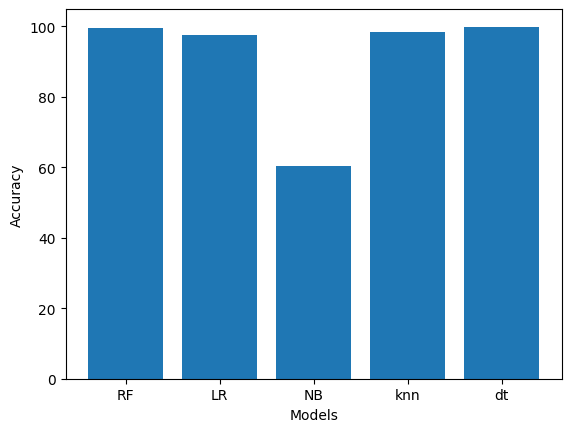

In [53]:
models = ['RF','LR','NB','knn','dt']
accuracy = [99.51,97.56,60.39,98.22,99.83]
plt.bar(models,accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [54]:
import joblib
joblib.dump(clf,'final.pkl')

['final.pkl']

In [55]:
X_train_new.head()

,age,sex,TSH,TT4,FTI,on thyroxine,on antithyroid medication,goitre,hypopituitary,psych,T3 measured,referral source
5823,26.988647,0,8.635913,129.988647,103.168212,0,0,0,0,0,1,4
6057,59.956985,0,8.966120,80.913969,82.521508,0,0,0,0,0,1,4
4981,56.120122,0,149.311691,40.652586,37.285702,0,0,0,0,0,1,4
4246,27.332010,0,11.041142,89.988088,104.660049,0,0,0,0,0,0,3
958,46.000000,0,2.200000,81.000000,107.000000,0,0,0,0,0,1,3


In [56]:
m=joblib.load('final.pkl')
x=m.predict(X_train_new)
print(list(x).index(1))
print(X_train_new.iloc[4])


4
age                           46.0
sex                            0.0
TSH                            2.2
TT4                           81.0
FTI                          107.0
on thyroxine                   0.0
on antithyroid medication      0.0
goitre                         0.0
hypopituitary                  0.0
psych                          0.0
T3 measured                    1.0
referral source                3.0
Name: 958, dtype: float64
